In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('informes')

Controlador P

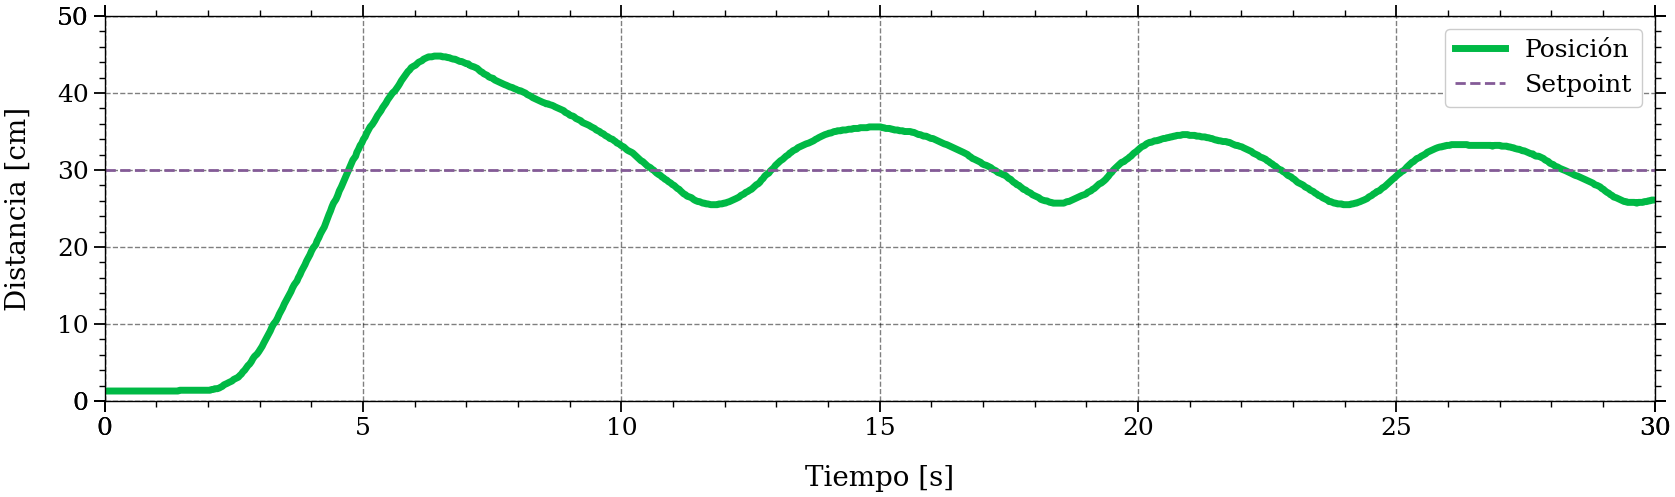

In [4]:
df = pd.read_csv('..\Mediciones\Clase 3\P\P-10.csv')
t = df['Time'].values
h = df['Position'].values / 10

fig, ax = plt.subplots(figsize=(20,5))

linea, = ax.plot(t, h, 'C2', lw=5, label='Posición')
ax.axhline(30, c='C3', ls='--', label='Setpoint')
ax.set_xticks(list(ax.get_xticks()) + [0, 30])
ax.set_yticks(list(ax.get_yticks()) + [0, 50])
ax.set_xlim(0, 30)
ax.set_ylim(0, 50)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Distancia [cm]')
ax.legend()

# linea.set_visible(False)  # Para hacer el template de figura sola
# fig.savefig('Kp_Altoipynb.png', dpi=500)
plt.show()

Controlador PI

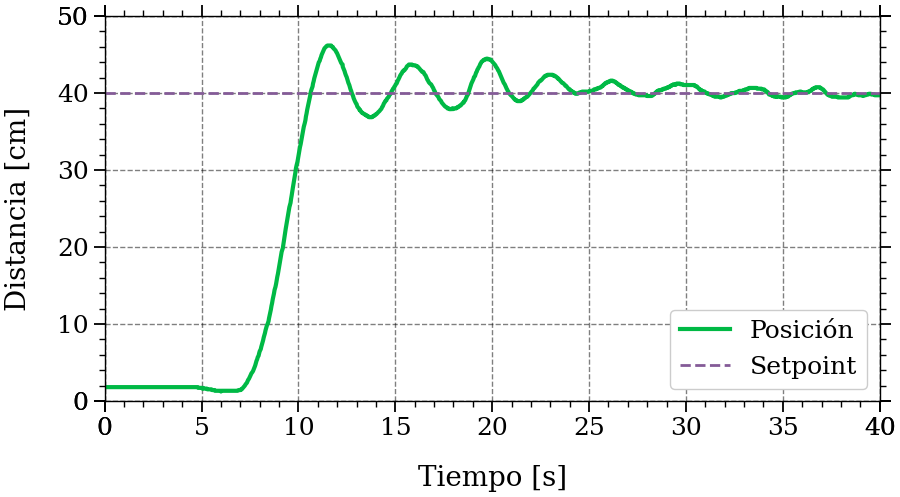

In [5]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.09-0-barrido.csv')
df = df[df['Time'] < 40]
t = df['Time'].values
h = df['Position'].values*0.095

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(t, h, 'C2', lw=3, label='Posición')
ax.axhline(40, c='C3', ls='--', label='Setpoint')

ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Distancia [cm]')
ax.set_xticks(list(ax.get_xticks()) + [0, 40])
ax.set_yticks(list(ax.get_yticks()) + [0, 50])
ax.set_xlim(0, 40)
ax.set_ylim(0, 50)
ax.legend()

# fig.savefig('PI.png', dpi=500)
plt.show()

Controlador PID

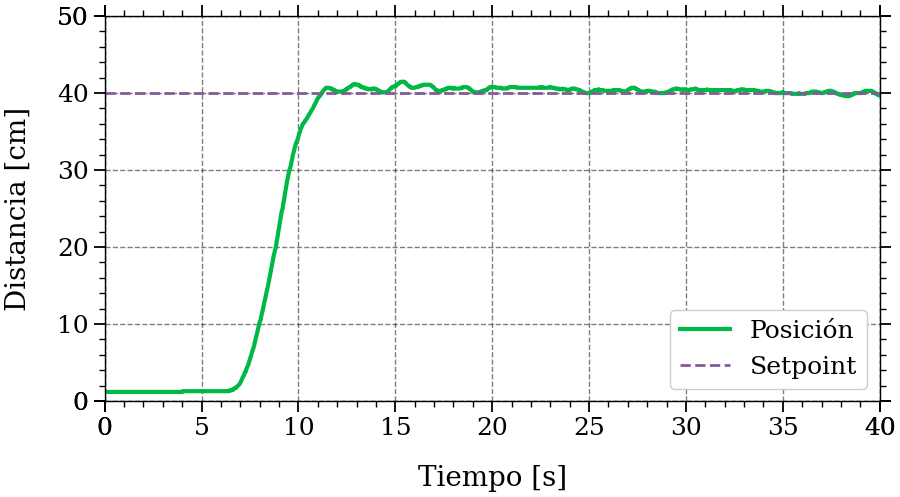

In [6]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[df['Time'] < 40]
t = df['Time'].values
h = df['Position'].values*0.0985

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(t, h, 'C2', lw=3, label='Posición')
ax.axhline(40, c='C3', ls='--', label='Setpoint')

ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Distancia [cm]')
ax.set_xticks(list(ax.get_xticks()) + [0, 40])
ax.set_yticks(list(ax.get_yticks()) + [0, 50])
ax.set_xlim(0, 40)
ax.set_ylim(0, 50)
ax.legend()

fig.savefig('PID.png', dpi=200)
plt.show()

Controlador on-off

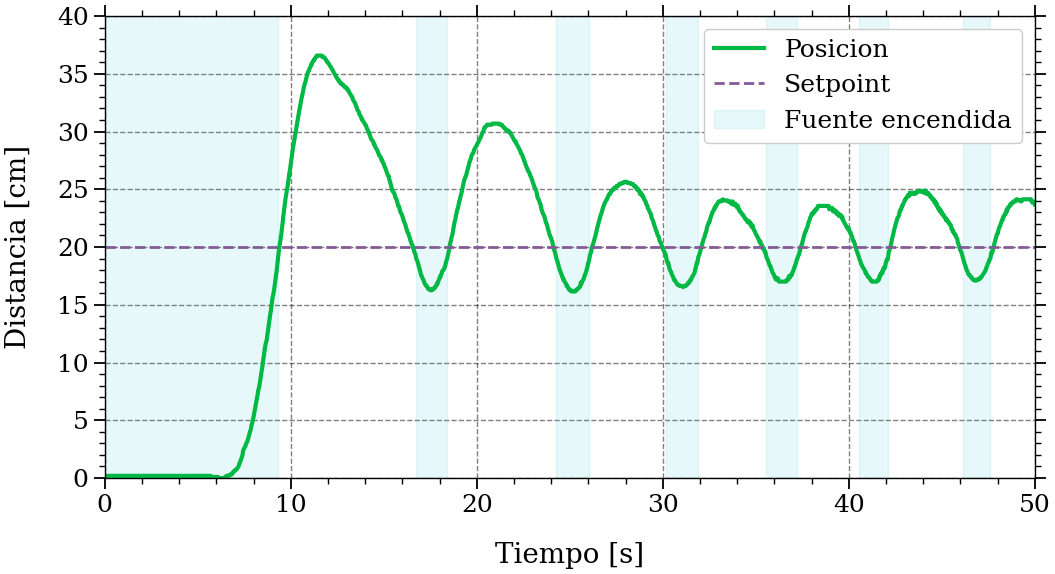

In [7]:
from scipy.signal import find_peaks

df = pd.read_csv('..\Mediciones\Clase 2\posiciones-onoff2.csv',
                 header=None, names=['Tiempo', 'Posicion', 'On-Off'])

df = df[df['Tiempo'] <= 60]

t = df['Tiempo'].values
t -= t[0]
h = df['Posicion'].values*0.095
onoff = df['On-Off'].values

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Distancia [cm]')
ax.set_xlim(0, 50)
ax.set_ylim(0, 40)

ax.plot(t, h, 'C2', lw=3, label='Posicion')
ax.axhline(20, c='C3', ls='--', label='Setpoint')

peaks = find_peaks(np.abs(np.diff(onoff)), threshold=0.5)[0]
peaks = np.insert(peaks, 0, 0)
for i in range(0, len(peaks)-1, 2):
    ax.fill_betweenx([0, 40], t[peaks[i]], t[peaks[i+1]],
                        color='C4', alpha=0.1)
ax.fill_betweenx([0, 40], t[peaks[-1]], t[-1],
                 color='C4', alpha=0.1, label='Fuente encendida')


fig.legend(loc='upper right', bbox_to_anchor=(0.9,0.88))

fig.savefig('On-Off.png', dpi=500)
plt.show()